# Movie Actor Image Classification

In [1]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\satya'

In [3]:
import os
os.chdir("E:\\testing_data")
img = cv2.imread("HR.jpg")
img.shape

(807, 646, 3)

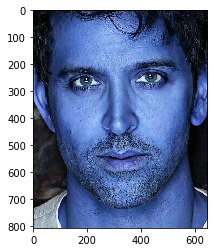

In [4]:
plt.imshow(img)

In [5]:
#Preprocessing: Detect face and eyes
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(807, 646)

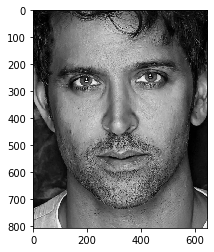

In [6]:
plt.imshow(gray, cmap="gray")

In [7]:
face_cascade=cv2.CascadeClassifier("E:\Movie_Actor_Dataset\haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("E:\Movie_Actor_Dataset\haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray, 1.3, 5 )
faces

array([[ 44,  72, 539, 539]], dtype=int32)

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(44, 72, 539, 539)

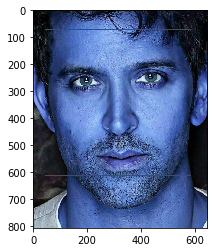

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

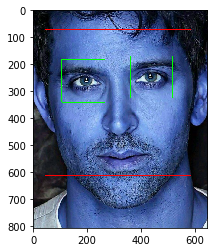

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


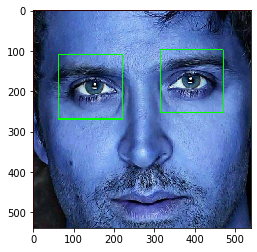

In [11]:
#Preprocessing: Crop the facial region of the image
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
#Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

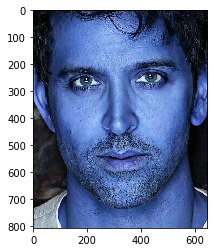

In [13]:
original_image = cv2.imread("HR.jpg")
plt.imshow(original_image)

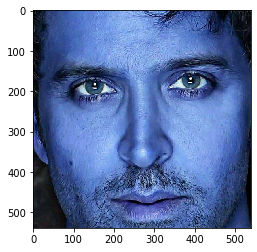

In [14]:
cropped_image = get_cropped_image_if_2_eyes("HR.jpg")
plt.imshow(cropped_image)

In [15]:
path_to_data="E:\Movie_Actor_Dataset"

path_to_cr_data="E:\Movie_Actor_Dataset\cropped\."

In [16]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['E:\\Movie_Actor_Dataset\\Hrithik Roshan',
 'E:\\Movie_Actor_Dataset\\Jhonny Depp',
 'E:\\Movie_Actor_Dataset\\Keanu Reeves',
 'E:\\Movie_Actor_Dataset\\Tom cruise',
 'E:\\Movie_Actor_Dataset\\Tom Hiddleston']

In [18]:
#Go through all images in dataset folder and create cropped images for them
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Hrithik Roshan
Generating cropped images in folder:  E:\Movie_Actor_Dataset\cropped\.Hrithik Roshan
Jhonny Depp
Generating cropped images in folder:  E:\Movie_Actor_Dataset\cropped\.Jhonny Depp
Keanu Reeves
Generating cropped images in folder:  E:\Movie_Actor_Dataset\cropped\.Keanu Reeves
Tom cruise
Generating cropped images in folder:  E:\Movie_Actor_Dataset\cropped\.Tom cruise
Tom Hiddleston
Generating cropped images in folder:  E:\Movie_Actor_Dataset\cropped\.Tom Hiddleston


In [20]:
#Manually examine cropped folder and delete any unwanted images
celebrity_file_names_dict

{'Hrithik Roshan': ['E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan1.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan2.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan3.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan4.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan5.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan6.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan7.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan8.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan9.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan10.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan11.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan12.jpg',
  'E:\\Movie_Actor_Dataset\\cropped\\.Hrithik Roshan/Hrithik Roshan13.jpg',
  '

In [21]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Hrithik Roshan': 0,
 'Jhonny Depp': 1,
 'Keanu Reeves': 2,
 'Tom cruise': 3,
 'Tom Hiddleston': 4}

In [22]:
#Preprocessing: Use wavelet transform as a feature for traning our model
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

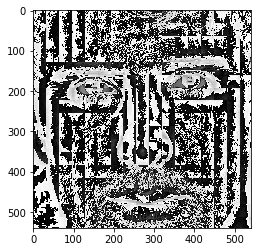

In [23]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [24]:
#Images in cropped folder can be used for model training. 
#We will use these raw images along with wavelet transformed images to train our classifier.
#Let's prepare X and y
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (60, 60))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (60, 60))
        combined_img = np.vstack((scalled_raw_img.reshape(60*60*3,1),scalled_img_har.reshape(60*60,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [25]:
len(X)

322

In [26]:
len(X[0])

14400

In [27]:
X = np.array(X).reshape(len(X),14400).astype(float)
X.shape

(322, 14400)

In [28]:
#splitting  the data into the training set and test set
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Applying Grid Search to find the best model and the best parameters
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'KNeighbors' : {
        'model':KNeighborsClassifier(p=2,metric='minkowski'),
        'params': {
            'n_neighbors': [1,5,10]
        }
    }
}

In [32]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
               
scores = []
best_estimators = {}

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    

In [33]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.738690,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.472959,{'n_estimators': 10}
2,logistic_regression,0.693027,{'C': 1}
3,KNeighbors,0.564031,{'n_neighbors': 1}


In [34]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(C=1, kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[31,  1,  0,  0,  1],
       [ 4,  6,  0,  0,  1],
       [ 4,  0,  6,  2,  2],
       [ 2,  1,  0, 11,  1],
       [ 2,  0,  0,  1,  5]], dtype=int64)

Text(33.0, 0.5, 'Truth')

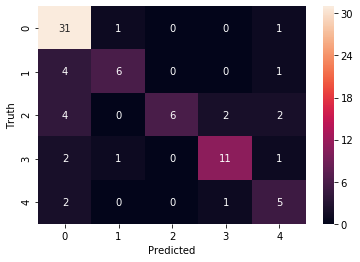

In [37]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [38]:
class_dict

{'Hrithik Roshan': 0,
 'Jhonny Depp': 1,
 'Keanu Reeves': 2,
 'Tom cruise': 3,
 'Tom Hiddleston': 4}

In [39]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [40]:
accuracy

0.7283950617283951

In [41]:
#Save the trained model
import joblib 

joblib.dump(classifier, 'saved_model.pkl') #Save the model as a pickle in a file 

['saved_model.pkl']

In [42]:
#Save class dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))